# ScRNA-Seq of human bone marrow, PBMC, pancreas and kidney

Inspired by the work of [Luecken, MD. et al.](https://www.nature.com/articles/s41592-021-01336-8#Sec35)
<br>Code: https://github.com/theislab/scib-reproducibility/tree/main 

In [1]:
# Import packages
import scanpy as sc
import pandas as pd
from functions import data_preprocessing as dp
import warnings
import numpy as np

warnings.filterwarnings("ignore", category=FutureWarning)

## Read AnnData and add metadata information

In [2]:
file_paths = '../../../data/processed/data_to_assess_generalisability/bone_marrow_human/'

filename = 'Assess_generalisability_bone_marrow.h5ad'

file = file_paths + filename
adata = sc.read(file, cache=True)
adata.X.shape


(54505, 7011)

In [3]:
adata.obs.head(5)

,n_counts,log_n_counts,n_genes,log_n_genes,pct_counts_in_top_20_genes,mt_frac,ribo_frac,hem_frac,outlier,size_factors,cell_type,patientID,study,chemistry,tissue,species,data_type,sample_ID
barcode,,,,,,,,,,,,,,,,,,
AAACCTGCAGCGAACA-1-Oetjen_A,6379.0,8.760923,1862,7.529943,0.243769,0.047970,0.214924,0.012071,False,1.373147,Non-classical monocytes,Oetjen_A,Oetjen,v2_10X,Bone_Marrow,Human,UMI,Oetjen_A
AAACCTGCATGTCCTC-1-Oetjen_A,4172.0,8.336390,1082,6.987490,0.321908,0.024928,0.456376,0.007191,False,0.923869,Memory CD4+ T cells,Oetjen_A,Oetjen,v2_10X,Bone_Marrow,Human,UMI,Oetjen_A
AAACCTGGTCGACTGC-1-Oetjen_A,6608.0,8.796187,1618,7.389564,0.241979,0.051907,0.314770,0.012409,False,1.431228,Classical Monocytes,Oetjen_A,Oetjen,v2_10X,Bone_Marrow,Human,UMI,Oetjen_A
AAACCTGGTCGCTTCT-1-Oetjen_A,5034.0,8.524169,1413,7.254178,0.265793,0.041716,0.264998,0.008741,False,1.101049,Classical Monocytes,Oetjen_A,Oetjen,v2_10X,Bone_Marrow,Human,UMI,Oetjen_A
AAACCTGTCCCGACTT-1-Oetjen_A,3998.0,8.293799,1127,7.028201,0.292646,0.043522,0.397949,0.012756,False,0.880252,Memory CD4+ T cells,Oetjen_A,Oetjen,v2_10X,Bone_Marrow,Human,UMI,Oetjen_A


In [4]:
# Ranodmize order
random_order = np.random.permutation(adata.n_obs)
adata = adata[random_order, :].copy()

## Visualize

c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


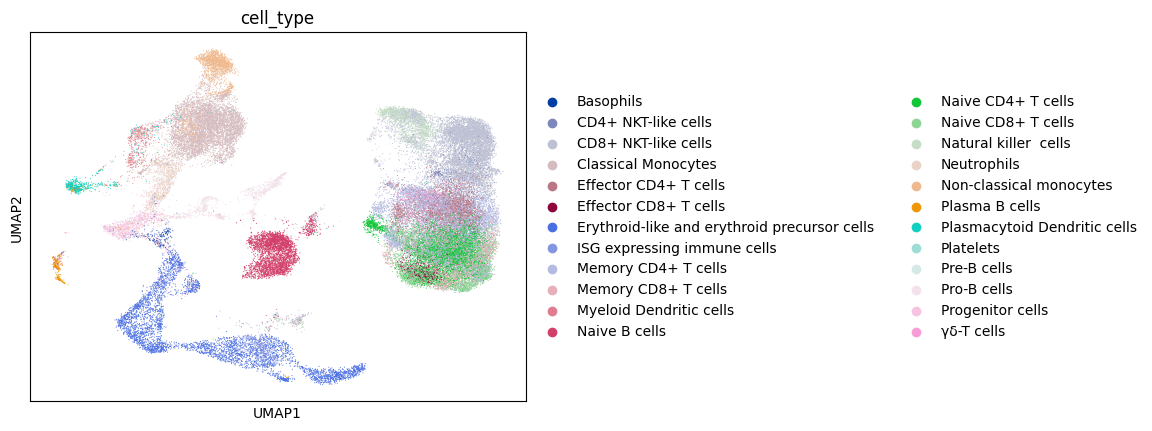

In [5]:
from sklearn.preprocessing import StandardScaler
vis_adata = adata.copy()
sc.pp.highly_variable_genes(vis_adata, n_top_genes=4000, flavor="cell_ranger")

# Scale data using dp.scale_data() to subtract data by the mean of each feature and divide by the std of that feature.
# This was done as a preprocessing step for annotating cell types in ScType in R and will therefore be used for visualization purpose. 
# https://github.com/satijalab/seurat/issues/1166  
vis_adata.X = dp.scale_data(vis_adata.X)

sc.pp.pca(vis_adata, n_comps=60, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(vis_adata, n_neighbors=15, n_pcs=60)
sc.tl.umap(vis_adata)
sc.pl.umap(vis_adata, color='cell_type')

c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


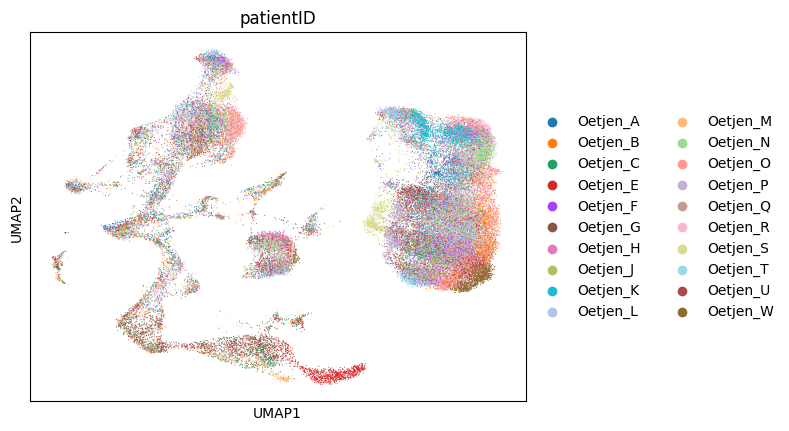

In [6]:
sc.pl.umap(vis_adata, color='patientID')

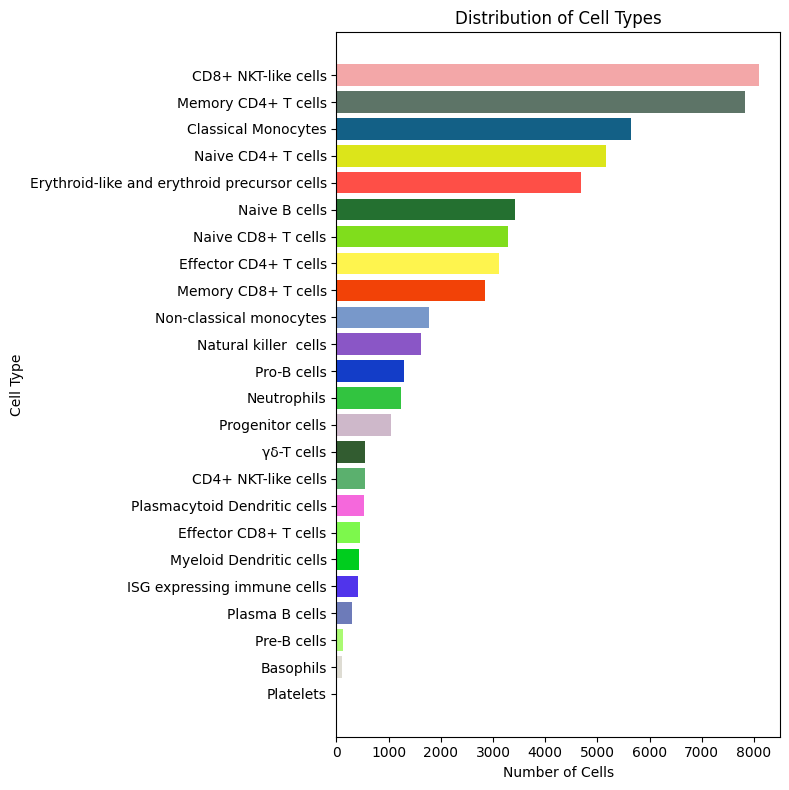

In [7]:
import matplotlib.pyplot as plt
import random

# Visualize distribution of cell types
cell_types = adata.obs["cell_type"]

cell_type_counts = {}
for string in cell_types:
    if string in cell_type_counts:
        cell_type_counts[string] += 1
    else:
        cell_type_counts[string] = 1

sorted_data = sorted(cell_type_counts.items(), key=lambda x: x[1], reverse=False)
unique_strings, counts = zip(*sorted_data)

bar_colors = [f'#{random.randint(0, 0xFFFFFF):06x}' for _ in unique_strings]

plt.figure(figsize=(8,8))
plt.barh(unique_strings, counts, color=bar_colors)

plt.xlabel('Number of Cells')
plt.ylabel('Cell Type')
plt.title('Distribution of Cell Types')

plt.tight_layout()
plt.show()